<a href="https://colab.research.google.com/github/TVLlam/1771020412_CNTT17-01_TRAN_VAN_LAM/blob/master/CNTT17_01_Tr%E1%BA%A7n_V%C4%83n_L%C3%A2m_BKT2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dữ liệu ban đầu:
    Mã SV          Họ và Tên                     Môn học Điểm      Xếp loại
0   SV001      Nguyễn Văn An                 Lập trình C  8.5          Giỏi
1   SV002      Trần Thị Bích            Cấu trúc dữ liệu    7           Khá
2   SV003      Lê Minh Cường               Cơ sở dữ liệu  6.5           Khá
3   SV004    Phạm Hoài Dương              Lập trình Java  NaN  Không hợp lệ
4   SV005  Hoàng Thanh Hương               Mạng máy tính    9          Giỏi
5   SV006        Bùi Văn Hậu                Hệ điều hành  ABC  Không hợp lệ
6   SV007    Nguyễn Hữu Hiệp              Phân tích TKHT  7.5           Khá
7   SV008       Đặng Thị Lan                 Nhập môn AI  5.5    Trung bình
8   SV009     Phan Văn Khánh            Bảo mật hệ thống  4.5           Yếu
9   SV010     Lương Thị Ngọc                     Học máy    8          Giỏi
10  SV011      Vũ Quang Dũng               Mạng máy tính  7.2           Khá
11  SV012   Nguyễn Thị Thanh            Lập trình Python    6    Trung 

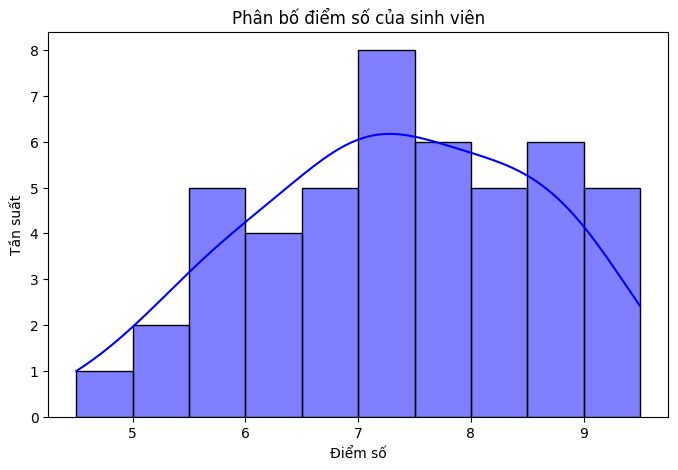

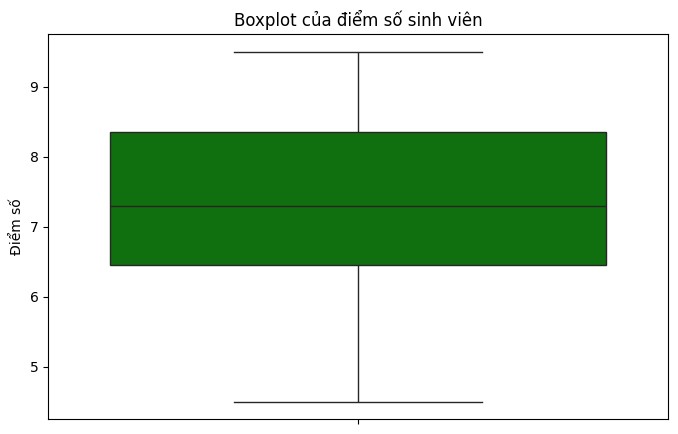

<ipython-input-5-ffffd438f079>:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_cleaned["Xếp loại"], palette="coolwarm")


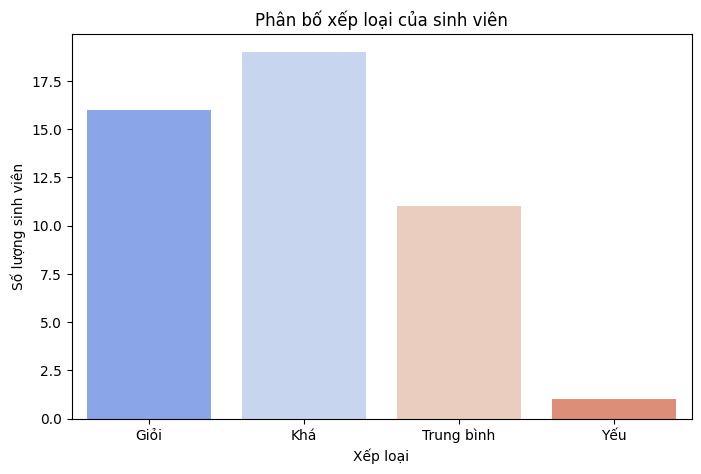

Độ chính xác của mô hình: 1.00
Báo cáo phân loại:
              precision    recall  f1-score   support

         Yếu       1.00      1.00      1.00         1
  Trung bình       1.00      1.00      1.00        11
         Khá       1.00      1.00      1.00        19
        Giỏi       1.00      1.00      1.00        16

    accuracy                           1.00        47
   macro avg       1.00      1.00      1.00        47
weighted avg       1.00      1.00      1.00        47

Tóm tắt kết quả:
- Độ chính xác của mô hình: 1.00
- Báo cáo phân loại:
              precision    recall  f1-score   support

         Yếu       1.00      1.00      1.00         1
  Trung bình       1.00      1.00      1.00        11
         Khá       1.00      1.00      1.00        19
        Giỏi       1.00      1.00      1.00        16

    accuracy                           1.00        47
   macro avg       1.00      1.00      1.00        47
weighted avg       1.00      1.00      1.00        47

- Những đ

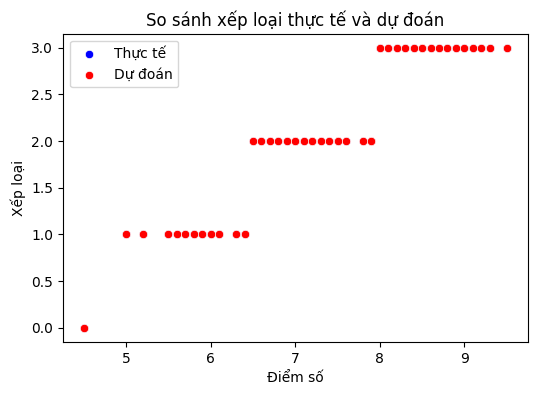

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

# Bước 1: Thu thập dữ liệu
file_path = "/content/drive/MyDrive/XSTT/CNTT17-01_TRẦN VĂN LÂM_BKT2.xlsx"
# Đọc file Excel
df = pd.read_excel(file_path)
print("Dữ liệu ban đầu:")
print(df)

# Bước 2: Làm sạch dữ liệu
# Chuyển đổi cột "Điểm" sang dạng số, thay lỗi bằng NaN
df["Điểm"] = pd.to_numeric(df["Điểm"], errors="coerce")

# Kiểm tra và xử lý giá trị thiếu
df_cleaned = df.dropna(subset=["Điểm", "Xếp loại"])

# Kiểm tra giá trị trùng lặp và loại bỏ
df_cleaned = df_cleaned.drop_duplicates()

print("Dữ liệu sau khi làm sạch:")
print(df_cleaned)

# Bước 3: Phân tích dữ liệu khám phá (EDA)
summary_stats = df_cleaned["Điểm"].describe()
print("Thống kê mô tả:")
print(summary_stats)

# Vẽ biểu đồ phân bố điểm số
plt.figure(figsize=(8, 5))
sns.histplot(df_cleaned["Điểm"], bins=10, kde=True, color="blue")
plt.xlabel("Điểm số")
plt.ylabel("Tần suất")
plt.title("Phân bố điểm số của sinh viên")
plt.show()

# Vẽ biểu đồ boxplot để phân tích sự phân bố điểm số
plt.figure(figsize=(8, 5))
sns.boxplot(y=df_cleaned["Điểm"], color="green")
plt.title("Boxplot của điểm số sinh viên")
plt.ylabel("Điểm số")
plt.show()

# Vẽ biểu đồ tần suất xếp loại
plt.figure(figsize=(8, 5))
sns.countplot(x=df_cleaned["Xếp loại"], palette="coolwarm")
plt.xlabel("Xếp loại")
plt.ylabel("Số lượng sinh viên")
plt.title("Phân bố xếp loại của sinh viên")
plt.show()

# Chuyển đổi nhãn "Xếp loại" thành số
label_mapping = {"Yếu": 0, "Trung bình": 1, "Khá": 2, "Giỏi": 3, "Xuất sắc": 4}
df_cleaned["Xếp loại"] = df_cleaned["Xếp loại"].map(label_mapping)

# Kiểm tra nếu có giá trị NaN sau khi ánh xạ nhãn
df_cleaned = df_cleaned.dropna(subset=["Xếp loại"])

# Bước 4: Xây dựng mô hình
X = df_cleaned[["Điểm"]].values
y = df_cleaned["Xếp loại"].values

# Huấn luyện mô hình Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y)

# Dự đoán trên chính dữ liệu đã có
y_pred = model.predict(X)

# Bước 5: Phân tích kết quả
accuracy = accuracy_score(y, y_pred)

# Xác định các lớp thực tế có trong y
unique_classes = np.unique(y)
class_labels = {0: "Yếu", 1: "Trung bình", 2: "Khá", 3: "Giỏi", 4: "Xuất sắc"}

# Lọc ra các nhãn tương ứng với dữ liệu thực tế
filtered_labels = [class_labels[i] for i in unique_classes]

# Cập nhật classification_report với các nhãn có sẵn
report = classification_report(y, y_pred, target_names=filtered_labels)

print(f"Độ chính xác của mô hình: {accuracy:.2f}")
print("Báo cáo phân loại:")
print(report)

# Tóm tắt kết quả
print("Tóm tắt kết quả:")
print(f"- Độ chính xác của mô hình: {accuracy:.2f}")
print("- Báo cáo phân loại:")
print(report)
print("- Những điểm cần cải thiện:")
print("  + Bổ sung nhiều dữ liệu hơn để tránh overfitting.")

# Vẽ biểu đồ so sánh kết quả thực tế và dự đoán
plt.figure(figsize=(6, 4))
sns.scatterplot(x=X.flatten(), y=y, color='blue', label='Thực tế')
sns.scatterplot(x=X.flatten(), y=y_pred, color='red', label='Dự đoán')
plt.xlabel("Điểm số")
plt.ylabel("Xếp loại")
plt.title("So sánh xếp loại thực tế và dự đoán")
plt.legend()
plt.show()


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
